In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
# load data
data_all, label_all = load_data('gaussian2d') #  'iris') #
data_num, feat_num = data_all.shape

# init painter
pca_painter = PaintPCA(data_all)
replay_painter = VisualiseReplay(data_all)

# prepare training and test data
randidx = np.random.permutation(data_num)
(data_train, data_test), (label_train, label_test) = [np.split(_all[randidx], [100]) for _all in (data_all, label_all)]

No PCA performed


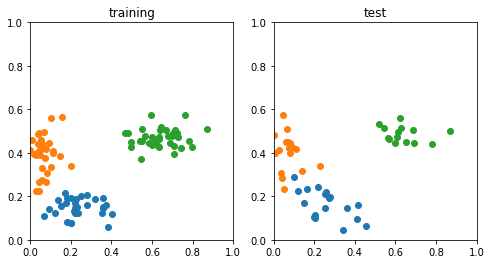

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ls_title = 'training', 'test'
for a, title, data, label in zip(ax, ls_title, (data_train, data_test), (label_train, label_test)):
    pca_painter.scatter(a, label, data)
    a.set_xlim(0, 1)
    a.set_ylim(0, 1)
    a.set_title(title)

In [4]:
no_epoch = 3

rho_train = 0.6
rho_valid = 0.6
rho_test = 0.6

replay_num = 100

Category 0 is too small
Category 0 is too small
Directory  _simcache/frames_2022-05-20_12-14-37  Created 
figure saved at _simcache/frames_2022-05-20_12-14-37/2022-05-20_12-14-37_learn[1653045277856842]


C:\Users\anish\anaconda3\lib\site-packages\ipykernel_launcher.py:85: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


figure saved at _simcache/frames_2022-05-20_12-14-37/2022-05-20_12-14-38_learn[1653045278352021]
Category 1 is too small
Category 1 is too small
figure saved at _simcache/frames_2022-05-20_12-14-37/2022-05-20_12-14-38_learn[1653045278930475]


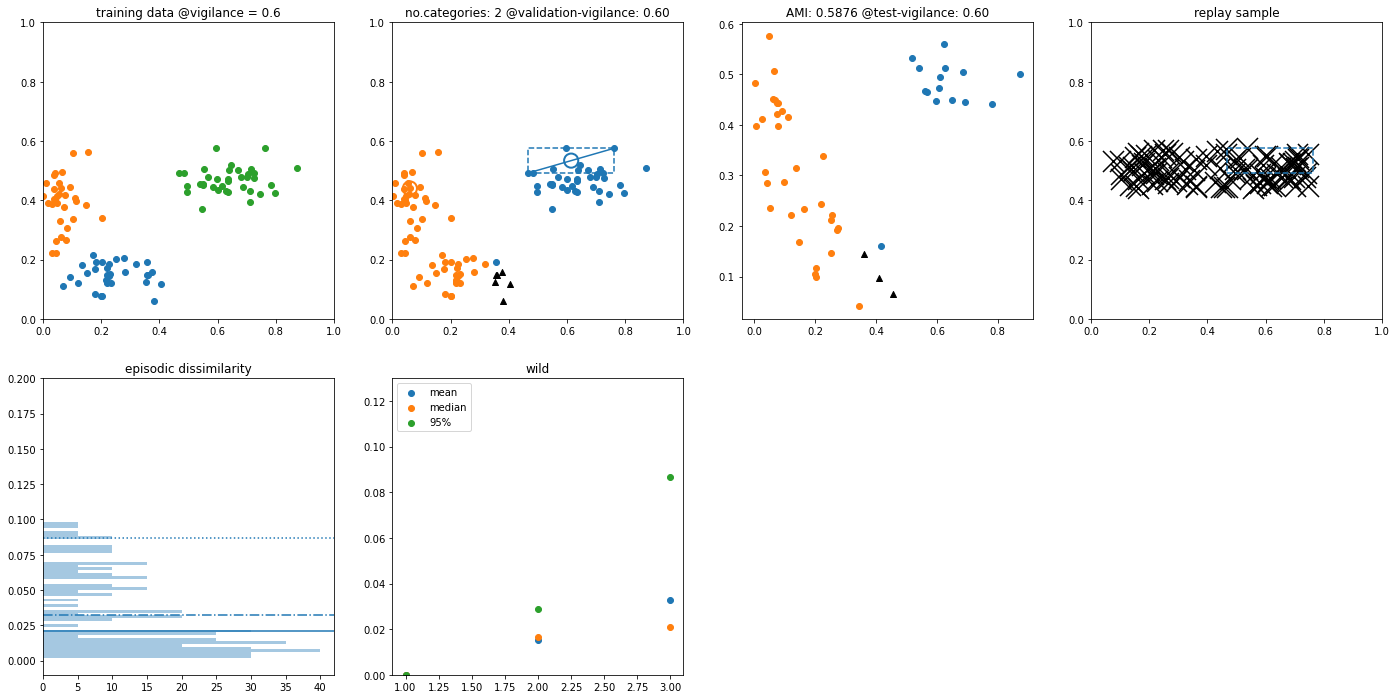

In [7]:
now = timestamp()[0]

# init fig
fig, ax = plt.subplot_mosaic('''
                                ABED
                                GC..
                                ''',
                                figsize = (24, 12))
#fig.tight_layout()

# plot training data
pca_painter.scatter(ax['A'], label_train, data_train)
ax['A'].set_title("training data @vigilance = {}".format(rho_train))


# init ART
net = FuzzyART(feat_num, alpha=1, gamma=.00001, rho=rho_train, best_match_num=2)
    
dat0 = np.zeros((data_train.shape[0],3))
maxdm = 0
hist_top = 0.2
for epoch, data in zip(range(no_epoch), data_train.reshape(-1, 1, 2)):
    for key in 'BCDEG':
        ax[key].cla()
    new_sample = [ax[key].scatter(*data[0], color='k', marker='x', s=666) for key in 'AB']
    
    # train
    net.train(data, rho=rho_train)
    cat_number = net.w.shape[0]
    
    # validation
    label_validall = net.test(data_train, rho_valid)
    label_valid = label_validall[:, 0].astype(int)
    
    # test
    label_testpall = net.test(data_test, rho_test)
    label_testp = label_testpall[:, 0].astype(int)
    AMI = metrics.adjusted_mutual_info_score(label_test, label_testp)

    # plot
    # validation and test
    pca_painter.scatter(ax['B'], label_valid, data_train)
    pca_painter.scatter(ax['E'], label_testp, data_test)
    
    ax['B'].set_title('no.categories: {} @validation-vigilance: {:.2f}'.format(cat_number, rho_valid))
    ax['E'].set_title('AMI: {:.4f} @test-vigilance: {:.2f}'.format(AMI, rho_test))
    
    # bipole and centre
    pca_painter.tripole(ax['B'], *net.getcat_bipole())
    
    # boundary    
    for key in 'BD':
        ax[key].set_prop_cycle(None)
        pca_painter.boundary(ax[key], net.getcat_vertex())
    
    # replay    
    replay = net.replay_null(replay_num)
    
    # key_sample, key_hist, key_stats, r, d, rs in zip('DEF', 'GHI', 'CMN', (r0, r1, r2), (dat0, dat1, dat2), ('wild', 'cats', 'vertex')):
        
    ax['D'].scatter(*replay[0].T, color='k', marker='x', s=444)
    dat0[epoch] = replay_painter.distance_to_truth(ax['G'], replay[0], hist_range_top=hist_top)
    for l, dm in zip(('mean', 'median', '95%'), dat0.T):
        ax['C'].scatter(np.arange(epoch+1)+1, dm[:epoch+1], label=l)
        maxdm = np.maximum(maxdm, np.max(dm))
    
    
    
    
    # info
    
    for key in 'ABD':
        ax[key].set_xlim(0, 1)
        ax[key].set_ylim(0, 1)
    
    for key, title in zip('DG', ('replay sample', 'episodic dissimilarity')):
        ax[key].set_title(title)    
    
    for key in 'G':
        ax[key].set_ylim(top=hist_top)
    
    for key, title in zip('C', ('wild', 'cats', 'vertex')):
        ax[key].set_title(title)
        ax[key].legend(loc=2)
        ax[key].set_ylim(0, maxdm*1.5)
    # save fig
    simname = 'learn'
    dirname = '_simcache/frames_{}'.format(now)
    savefigure_datetime(fig, simname, dirname)
    
    [ns.remove() for ns in new_sample]

